# MATH 280 Lecture 11: Least squares problems

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Linear regression

Cricket chirps vs Temperature. 

source: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html
*The songs of insects* by G.W. Pierce, Harvard University Press (1948).

In [5]:
T=np.array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82.0, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3])
c=np.array([20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15.0, 17.2, 16.0, 17.0, 14.4])

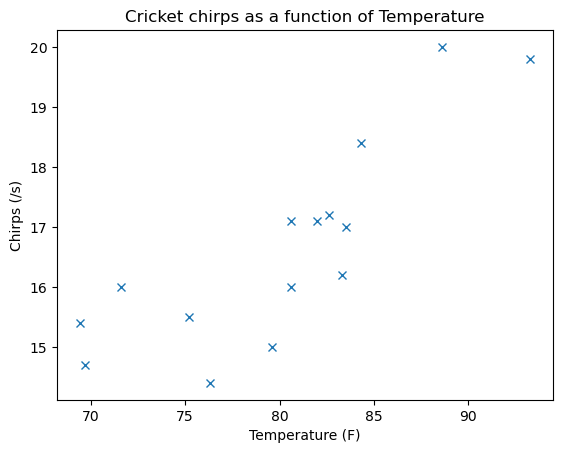

In [7]:
plt.plot(T,c, 'x')
plt.title('Cricket chirps as a function of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (/s)')
plt.show()

We want to find a line 
$$c(T)=\beta_0+\beta_1 T =  \begin{bmatrix} 1 & T \end{bmatrix}\begin{bmatrix} \beta_0\\ \beta_1 \end{bmatrix},$$
that best approximates the data set.

### Least squares error

$$
\sum_{i=1}^n (c(T_i)-c_i)^2 = \sum_{i=1}^n (\beta_0 +\beta_1 T_i-c_i)^2
$$


<center>...(Derivation on blackboard)...</center>


$$
=\left \| A \underline{\beta} - \underline{c}\right\|^2
$$

where

$$ A= 
\begin{bmatrix} 
1  & T_1\\
1  & T_2\\
\vdots & \vdots\\
1  & T_n
\end{bmatrix}, \qquad 
\underline{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, \qquad
\underline{c} = \begin{bmatrix} c_1\\c_2\\ \vdots \\c_n\end{bmatrix}
$$




In [21]:
A=np.vstack((np.ones(len(T)),T)).transpose()

A= np.zeros((len(T),2))
A[:,0]=1
A[:,1]=T

print(A)

[[ 1.  88.6]
 [ 1.  71.6]
 [ 1.  93.3]
 [ 1.  84.3]
 [ 1.  80.6]
 [ 1.  75.2]
 [ 1.  69.7]
 [ 1.  82. ]
 [ 1.  69.4]
 [ 1.  83.3]
 [ 1.  79.6]
 [ 1.  82.6]
 [ 1.  80.6]
 [ 1.  83.5]
 [ 1.  76.3]]


In [11]:
# Normal equations:
theta_best = np.linalg.solve(A.T@A, A.T@c)
print(theta_best)

[-0.30914439  0.21192501]


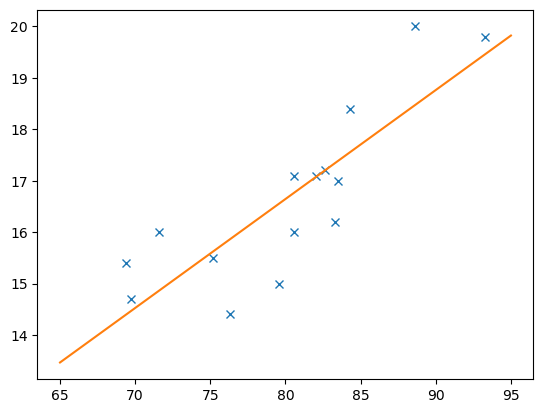

In [12]:
trange=np.linspace(65,95,100)

plt.plot(T,c, 'x')

plt.plot(trange, theta_best[0]+theta_best[1]*trange)

In [13]:
# qr decomposition
Q,R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.25819889  0.34108296]
 [-0.25819889 -0.33630142]
 [-0.25819889  0.52835982]
 [-0.25819889  0.16974456]
 [-0.25819889  0.02231384]
 [-0.25819889 -0.19285532]
 [-0.25819889 -0.41200909]
 [-0.25819889  0.07809843]
 [-0.25819889 -0.42396293]
 [-0.25819889  0.12989842]
 [-0.25819889 -0.0175323 ]
 [-0.25819889  0.10200612]
 [-0.25819889  0.02231384]
 [-0.25819889  0.13786765]
 [-0.25819889 -0.14902456]]
[[  -3.87298335 -309.99358703]
 [   0.           25.09653363]]


In [14]:
beta_qr = np.linalg.solve(R, Q.T@c)

In [15]:
print(beta_qr)
print(theta_best)

[-0.30914439  0.21192501]
[-0.30914439  0.21192501]


In [17]:
# built-in function

lstsqresult = np.linalg.lstsq(A,c, rcond=None)

print(lstsqresult)

(array([-0.30914439,  0.21192501]), array([12.27000698]), 2, array([311.03177063,   0.31250331]))


In [19]:
beta_builtin = lstsqresult[0]

print(beta_builtin)
print(theta_best)
print(beta_qr)

[-0.30914439  0.21192501]
[-0.30914439  0.21192501]
[-0.30914439  0.21192501]


In [20]:
np.polyfit(T,c,1)

array([ 0.21192501, -0.30914439])

In [28]:
print(np.dot(A.T,A))
print(A.T@A)
print(A.T.dot(A))


[[1.500000e+01 1.200600e+03]
 [1.200600e+03 9.672586e+04]]
[[1.500000e+01 1.200600e+03]
 [1.200600e+03 9.672586e+04]]
[[1.500000e+01 1.200600e+03]
 [1.200600e+03 9.672586e+04]]
